In [ ]:
# Exercise 1
# tasks:
# x הוא מספר הדקות של פעילות נמרצת ביום ו-y הוא אם האדם הגיע ל-10,000 צעדיים באותו יום
# התאם מודל רגרסיה לוגיסטית באמצעות scikit-learn עם solver='liblinear
# על הטבלה למעלההדפס intercept_ ו-coef_גבול ההחלטה עבור 70%: p(y=1∣x)=0.70
# חשב את ההסתברויות המוערכות עבור x = [16, 27, 33, 49, 67, 90] ורשום אותן

Intercept (β₀): -1.48
Coefficient (β₁): 0.04
Logistic equation: P(return-10k ) = 1 / (1 + e^-(-1.48 + 0.04 × minutes))
Decision boundary: 55.47 minutes


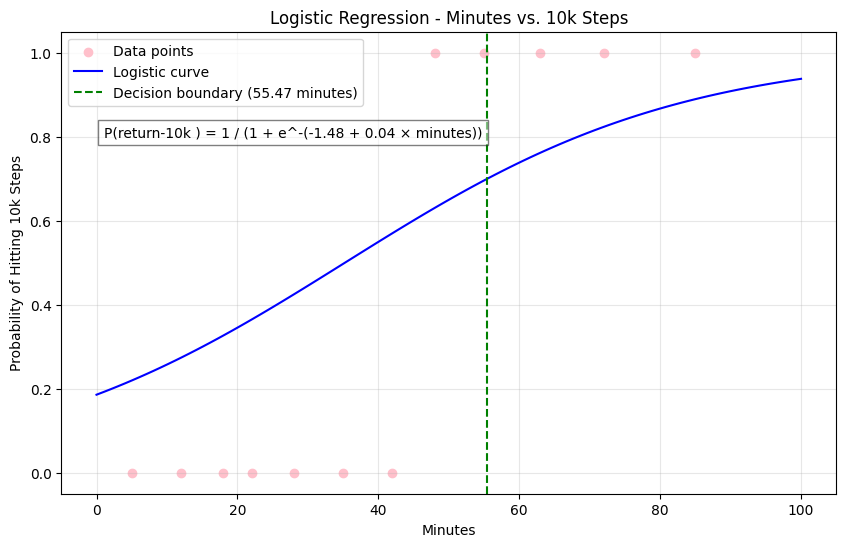


Predictions:
16 minutes: 0.31 probability of return steps ( person Won't hit 10k steps that day)
27 minutes: 0.41 probability of return steps ( person Won't hit 10k steps that day)
33 minutes: 0.48 probability of return steps ( person Won't hit 10k steps that day)
49 minutes: 0.64 probability of return steps ( person Won't hit 10k steps that day)
67 minutes: 0.79 probability of return steps ( person hit 10k steps that day)
90 minutes: 0.91 probability of return steps ( person hit 10k steps that day)


In [41]:
## import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
from math import log

# data
x_minutes = np.array([5, 12, 18, 22, 28, 35, 42, 48, 55, 63, 72, 85]).reshape(-1, 1)
y_10k_steps = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Fit a logistic regression model using scikit-learn with solver='liblinear' on the table above
model = LogisticRegression(solver='liblinear')
model.fit(x_minutes, y_10k_steps)

# Print results
print(f"Intercept (β₀): {model.intercept_[0]:.2f}")
print(f"Coefficient (β₁): {model.coef_[0][0]:.2f}")

# Calculate equation
equation = f"P(return-10k ) = 1 / (1 + e^-({model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f} × minutes))"
print(f"Logistic equation: {equation}")

# Helper: get boundary for any probability
def get_threshold(probability):
    logit = log(probability / (1 - probability))
    return (logit - b0) / b1

# # Coefficients
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

# Fit a logistic regression model using scikit-learn with solver='liblinear' on the table above
decision_boundary = get_threshold(0.70)
print(f"Decision boundary: {decision_boundary:.2f} minutes")

# Generate points for the logistic curve
x_test = np.linspace(0, 100, 100).reshape(-1, 1)
y_proba = model.predict_proba(x_test)[:, 1]

# Create the graph
plt.figure(figsize=(10, 6))
plt.scatter(x_minutes, y_10k_steps, color='pink', marker='o', label='Data points')
plt.plot(x_test, y_proba, color='blue', label='Logistic curve')
plt.axvline(x=decision_boundary, color='green', linestyle='--', label=f'Decision boundary ({decision_boundary:.2f} minutes)')

# Add labels and formatting
plt.title('Logistic Regression - Minutes vs. 10k Steps')
plt.xlabel('Minutes')
plt.ylabel('Probability of Hitting 10k Steps')
plt.grid(True, alpha=0.3)
plt.legend()
plt.text(1, 0.8, equation, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.ylim(-0.05, 1.05)
plt.show()

# Compute predicted probabilities for x = [16, 27, 33, 49, 67, 90] and list them
print("\nPredictions:")
for minutes in [16, 27, 33, 49, 67, 90]:
    probability = 1 / (1 + np.exp(-(model.intercept_[0] + model.coef_[0][0] * minutes)))
    outcome = " person hit 10k steps that day" if probability >= 0.75 else " person Won't hit 10k steps that day"
    print(f"{minutes} minutes: {probability:.2f} probability of return steps ({outcome})")

In [ ]:
# Exercise 2
# התאם רגרסיה לוגיסטית עם פתרון='liblinear' תוך שימוש בתכונות [x1, x2]
# הדפס את intercept_ ואת כל הערכים של coef_ (should be one row with two values:[β1, β2])
# *בונוס: כתוב את משוואת הרגרסיה
# # חשב את הסיכוי המנבא עבור הנקודה [x1, x2] = [6.5, 7.5]

Intercept (β₀): -0.355
Coefficient (β₁) - study hours: 0.885
Coefficient (β₂) - sleep hours: -0.693

Logistic Regression Equation:
P(pass) = 1 / (1 + e^-(-0.355 + 0.885 * x1 + -0.693 * x2))
Confusion Matrix:
[[2 0]
 [0 3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



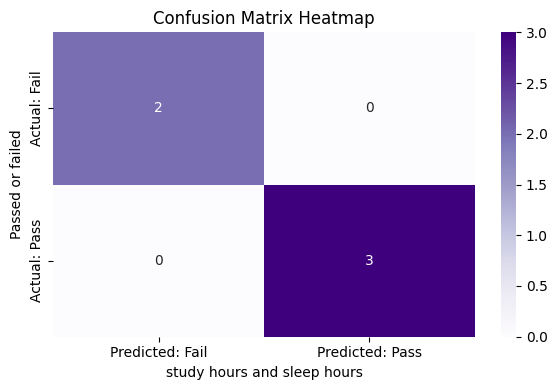


Predicted probability for  the point [6.5, 7.5]: 0.551
passed the mock exam [6.5, 7.5] fail


In [39]:
## import #heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# data
X_1_2 = np.array([
    [2, 5.0],
    [3, 5.5],
    [4, 5.0],
    [4, 6.0],
    [5, 5.5],
    [5, 6.5],
    [6, 6.0],
    [6, 7.0],
    [7, 6.5],
    [7, 7.5],
    [8, 6.0],
    [8, 7.0],
    [9, 7.0],
    [10, 7.5]
])

y_pass = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Print intercept_ and all entries of coef_ (there should be one row with two values: [β1, β2])
y_pred = model.predict(X_test)
b = model.intercept_[0]
b1, b2 = model.coef_[0]
print(f"Intercept (β₀): {b:.3f}")
print(f"Coefficient (β₁) - study hours: {b1:.3f}")
print(f"Coefficient (β₂) - sleep hours: {b2:.3f}")

# === Regression equation ===
print("\nLogistic Regression Equation:")
print(f"P(pass) = 1 / (1 + e^-({b:.3f} + {b1:.3f} * x1 + {b2:.3f} * x2))")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", \
            xticklabels=["Predicted: Fail", "Predicted: Pass"], yticklabels=["Actual: Fail", "Actual: Pass"])
plt.xlabel("study hours and sleep hours")
plt.ylabel("Passed or failed")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

# Compute the predicted probability for the point [x1, x2] = [6.5, 7.5]
for_6_7 = np.array([[6.5, 7.5]])
probability  = model.predict_proba(for_6_7)[0][1]
print(f"Predicted probability for  the point [6.5, 7.5]: {p:.3f}")
print("passed the mock exam [6.5, 7.5]", "pass" if probability  == 1 else "fail")